C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible st

Résultats de toutes les combinaisons possibles :
Ordre : (0, 0, 0) | BIC : 14073.569416303922 | AIC : 14063.03576160888
Ordre : (0, 0, 1) | BIC : 13169.01383676613 | AIC : 13153.213354723568
Ordre : (0, 0, 2) | BIC : 12896.460890284796 | AIC : 12875.393580894714
Ordre : (0, 0, 3) | BIC : 12815.093238114665 | AIC : 12788.759101377062
Ordre : (0, 0, 4) | BIC : 12789.491758825317 | AIC : 12757.890794740193
Ordre : (0, 0, 5) | BIC : 12774.668910418322 | AIC : 12737.801118985679
Ordre : (0, 1, 0) | BIC : 12863.188182281086 | AIC : 12857.92205350153
Ordre : (0, 1, 1) | BIC : 12868.793514756975 | AIC : 12858.261257197863
Ordre : (0, 1, 2) | BIC : 12729.475398143986 | AIC : 12713.677011805317
Ordre : (0, 1, 3) | BIC : 12651.195973980595 | AIC : 12630.13145886237
Ordre : (0, 1, 4) | BIC : 12642.694495847358 | AIC : 12616.363851949576
Ordre : (0, 1, 5) | BIC : 12648.520536156338 | AIC : 12616.923763479
Ordre : (1, 0, 0) | BIC : 12722.18331939821 | AIC : 12706.382837355648
Ordre : (1, 0, 1) | BIC

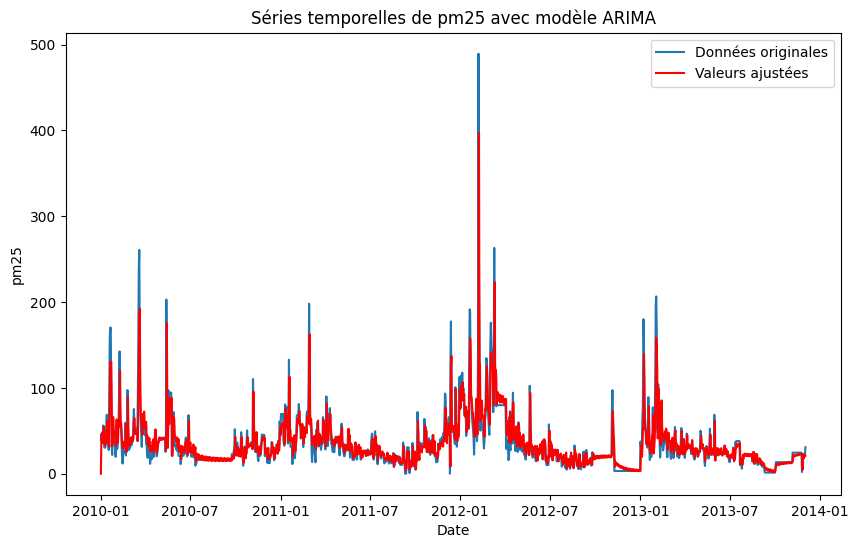

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Charger les données depuis le fichier CSV
data = pd.read_csv('C:/Users/NZO BUSINESS/Documents/Assimilation/data.csv')

# Supprimer les lignes avec des valeurs de "pm25" supérieures à 150
#data = data[data['Bel Air'] <= 100]

# Supprimer les colonnes non nécessaires et formater les données
data = data.dropna()  # Supprimer les lignes avec des valeurs manquantes
data['Date'] = pd.to_datetime(data['Date'])  # Convertir la colonne Date en type datetime
data = data.set_index('Date')  # Définir la colonne Date comme index

# Trier l'index dans l'ordre croissant
data = data.sort_index()

# Sélectionner les données à partir du 1er mai 2023
start_date = '2010-01-01'
selected_data = data[start_date:]

# Sélectionner la colonne "pm25"
series_data = selected_data['Bel Air']

# Régulariser les données avec une fréquence de 15 minutes en utilisant la méthode 'pad'
data1 = series_data.asfreq('D', method='pad')

# Regrouper les données par jour et calculer la moyenne
#daily_data = data_uniforme.resample('D').mean()

# Préparer une liste pour stocker les résultats des meilleures combinaisons
best_results = []

# Préparer une liste pour stocker tous les résultats des combinaisons
all_results = []

# Parcourir toutes les combinaisons possibles d'ordre pour p, d et q
p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = sm.tsa.ARIMA(data1, order=(p, d, q))
                model_fit = model.fit()
                
                bic = model_fit.bic
                aic = model_fit.aic
                
                all_results.append({
                    'order': (p, d, q),
                    'bic': bic,
                    'aic': aic
                })
                
                if len(best_results) == 0 or bic < best_results[-1]['bic']:
                    best_results.append({
                        'order': (p, d, q),
                        'bic': bic,
                        'aic': aic
                    })
            except:
                continue

# Afficher tous les résultats des combinaisons
print("Résultats de toutes les combinaisons possibles :")
for result in all_results:
    print(f"Ordre : {result['order']} | BIC : {result['bic']} | AIC : {result['aic']}")

# Trouver les meilleures combinaisons pour BIC et AIC
best_bic_combination = min(best_results, key=lambda x: x['bic'])
best_aic_combination = min(best_results, key=lambda x: x['aic'])

print(f"\nMeilleure combinaison BIC : {best_bic_combination['order']} (BIC : {best_bic_combination['bic']})")
print(f"Meilleure combinaison AIC : {best_aic_combination['order']} (AIC : {best_aic_combination['aic']})")

# Créer un DataFrame à partir de la liste des résultats
results_df = pd.DataFrame(all_results)

# Enregistrer le DataFrame dans un fichier Excel
#results_df.to_excel('resultats_combinaisons.xlsx', index=False)

# Tracer le graphique des séries temporelles
plt.figure(figsize=(10, 6))
plt.plot(data1.index, data1, label='Données originales')
plt.plot(model_fit.fittedvalues.index, model_fit.fittedvalues, color='red', label='Valeurs ajustées')
plt.title('Séries temporelles de pm25 avec modèle ARIMA')
plt.xlabel('Date')
plt.ylabel('pm25')
plt.legend()

# Sauvegarder le graphique au format PNG
plt.savefig('resultat_pm25_arima.png')

# Afficher le graphique
plt.show()
